In [11]:
from keras.datasets import cifar10
from keras.datasets import cifar100
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import RMSprop

In [2]:
from keras.datasets import cifar10
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical 
(x_train,y_train),(x_test,y_test) = cifar100.load_data()
x_train.shape
y_train.shape

169017344/169001437 [==============================] - 2s 0us/step


(50000, 1)

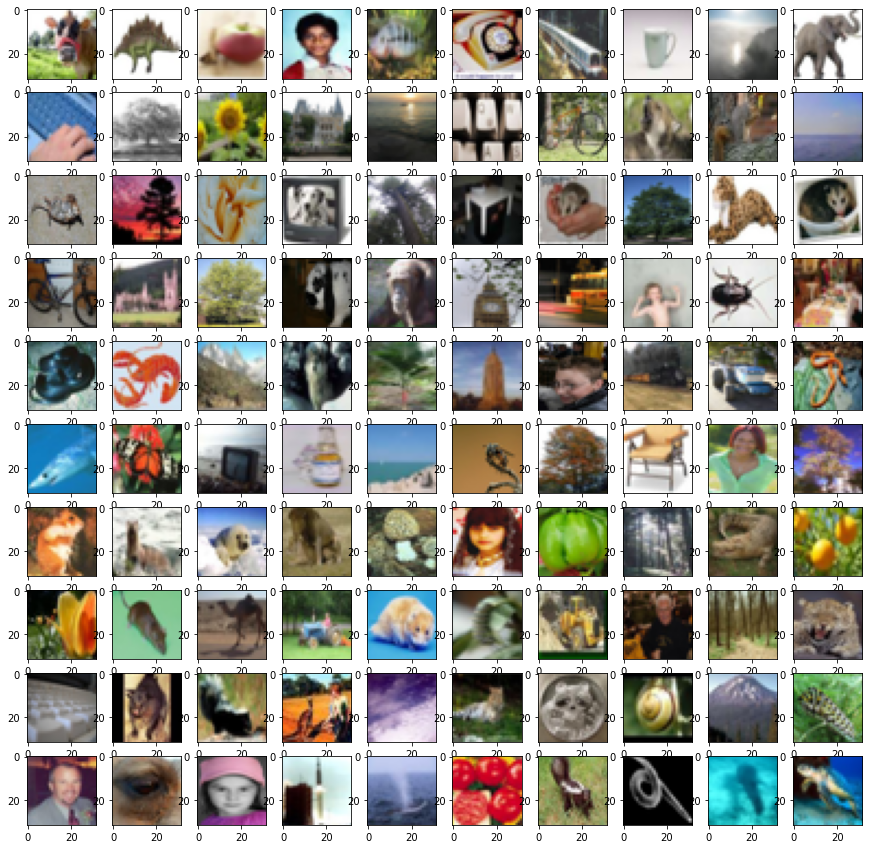

In [3]:
from numpy import subtract
plt.figure(figsize=(15,15))
for i in range (100):
  plt.subplot(10,10,i+1)
  plt.imshow(x_train[i])
plt.show()


In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255
y_train=to_categorical(y_train,100)
y_test=to_categorical(y_test,100)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
y_test.shape

(10000, 100)

In [8]:
y_train.shape

(50000, 100)

In [9]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(784,activation='relu'))
model.add(Dense(784,activation='relu'))
model.add(Dense(100,activation='Softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 784)               2409232   
                                                                 
 dense_1 (Dense)             (None, 784)               615440    
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
Total params: 3,103,172
Trainable params: 3,103,172
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=128,epochs=50,verbose=1,validation_data=(x_test,y_test))

Epoch 1/50
391/391 [==============================] - 24s 59ms/step - loss: 4.2329 - accuracy: 0.0679 - val_loss: 3.8426 - val_accuracy: 0.1150
Epoch 2/50
391/391 [==============================] - 22s 57ms/step - loss: 3.7276 - accuracy: 0.1336 - val_loss: 3.7177 - val_accuracy: 0.1308
Epoch 3/50
391/391 [==============================] - 26s 67ms/step - loss: 3.5396 - accuracy: 0.1665 - val_loss: 3.5838 - val_accuracy: 0.1614
Epoch 4/50
391/391 [==============================] - 22s 57ms/step - loss: 3.4179 - accuracy: 0.1890 - val_loss: 3.5784 - val_accuracy: 0.1638
Epoch 5/50
391/391 [==============================] - 25s 63ms/step - loss: 3.3162 - accuracy: 0.2071 - val_loss: 3.5018 - val_accuracy: 0.1888
Epoch 6/50
391/391 [==============================] - 26s 66ms/step - loss: 3.2375 - accuracy: 0.2218 - val_loss: 3.4675 - val_accuracy: 0.1924
Epoch 7/50
391/391 [==============================] - 24s 60ms/step - loss: 3.1673 - accuracy: 0.2334 - val_loss: 3.4642 - val_accuracy:

Sai số kiểm tra là:  5.627303600311279
Độ chính xác kiểm tra là:  0.20960000157356262


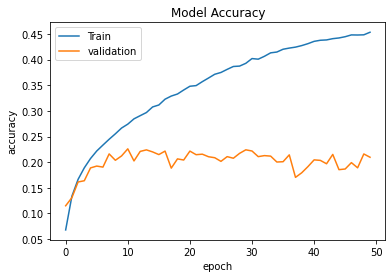

In [13]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [14]:
model.save('/content/drive/MyDrive/BT AI/cifar100.h5')

array([29])

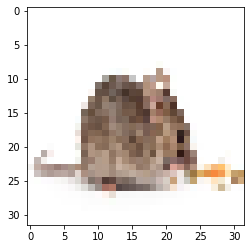

In [21]:
img = load_img('/content/drive/MyDrive/Anh test/chuot1.jpg',target_size=(32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32,32,3)
img = img/255
np.argmax(model.predict(img),axis=-1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')